## News Trends

In [26]:
import requests

In [27]:
ELASTIC_SEARCH_URL = "https://search-finproject-ljhn6uc6vhc6bjstfrqzt6jk4m.ap-northeast-2.es.amazonaws.com"
ELASTIC_SEARCH_ID = 'fintech'
ELASTIC_SEARCH_PW = '6sRC2tp#ck'
ELASTIC_SEARCH_AUTH = (ELASTIC_SEARCH_ID, ELASTIC_SEARCH_PW)

In [28]:
url = f"{ELASTIC_SEARCH_URL}/news/_search"

In [29]:
print(url)

https://search-finproject-ljhn6uc6vhc6bjstfrqzt6jk4m.ap-northeast-2.es.amazonaws.com/news/_search


In [30]:
query = """
{
  "size" : 0,
  "aggs" : {
    "group_by_date" : {
      "date_histogram": {
        "field": "created_at",
        "interval": "day"
      }
    }
  }
}
"""

In [31]:
headers = {
    'Content-Type': 'application/json'
}

In [32]:
resp = requests.get(
    url,
    data=query,
    headers=headers,
    auth=ELASTIC_SEARCH_AUTH
)

In [33]:
resp.status_code

200

In [34]:
data = resp.json()

In [35]:
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits', 'aggregations'])

In [36]:
trends = data['aggregations']['group_by_date']['buckets']
trends

[{'key_as_string': '2022-04-03T00:00:00.000Z',
  'key': 1648944000000,
  'doc_count': 108},
 {'key_as_string': '2022-04-04T00:00:00.000Z',
  'key': 1649030400000,
  'doc_count': 4036},
 {'key_as_string': '2022-04-05T00:00:00.000Z',
  'key': 1649116800000,
  'doc_count': 2536},
 {'key_as_string': '2022-04-06T00:00:00.000Z',
  'key': 1649203200000,
  'doc_count': 0},
 {'key_as_string': '2022-04-07T00:00:00.000Z',
  'key': 1649289600000,
  'doc_count': 4177},
 {'key_as_string': '2022-04-08T00:00:00.000Z',
  'key': 1649376000000,
  'doc_count': 1873},
 {'key_as_string': '2022-04-09T00:00:00.000Z',
  'key': 1649462400000,
  'doc_count': 0},
 {'key_as_string': '2022-04-10T00:00:00.000Z',
  'key': 1649548800000,
  'doc_count': 0},
 {'key_as_string': '2022-04-11T00:00:00.000Z',
  'key': 1649635200000,
  'doc_count': 0},
 {'key_as_string': '2022-04-12T00:00:00.000Z',
  'key': 1649721600000,
  'doc_count': 0},
 {'key_as_string': '2022-04-13T00:00:00.000Z',
  'key': 1649808000000,
  'doc_count': 

## 1. 5월 각 날짜별로 경제 분야 전체뉴스 기사 갯수

In [37]:
import pandas as pd
df = pd.DataFrame(data = trends)
df = df.iloc[28:]
df.head()

,key_as_string,key,doc_count
28,2022-05-01T00:00:00.000Z,1651363200000,1974
29,2022-05-02T00:00:00.000Z,1651449600000,5790
30,2022-05-03T00:00:00.000Z,1651536000000,5953
31,2022-05-04T00:00:00.000Z,1651622400000,5317
32,2022-05-05T00:00:00.000Z,1651708800000,1963


In [38]:
df['date'] = pd.to_datetime(df['key_as_string'])

In [39]:
df = df.set_index('date')

<function matplotlib.pyplot.show(close=None, block=None)>

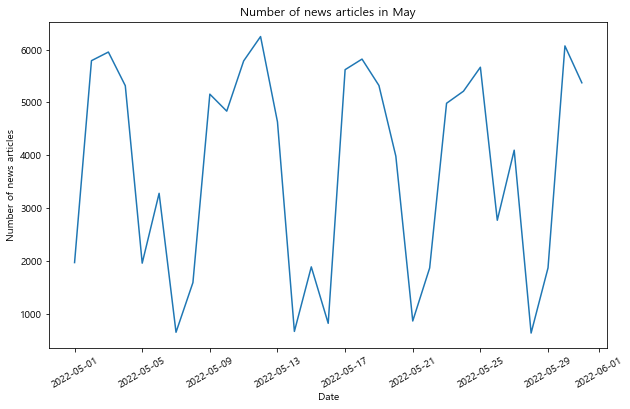

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
plt.plot(df['doc_count'])
plt.xticks(rotation = 30)
plt.xlabel("Date")
plt.ylabel("Number of news articles")
plt.title("Number of news articles in May")
plt.show

## 2. 뉴스 기사 가장 많은 탑 5 언론사 선정 후, 5월 각 날짜 별로 각 언론사의 기사 갯수 time-series chart 그리기

In [41]:
query = """
{
  "size" : 0,
  "aggs" : {
    "group_by_publisher" : {
      "terms":{
        "field": "publisher.keyword",
        "size":10
        }
      }
    }
}
"""


In [42]:
resp = requests.get(
    url,
    data=query,
    headers=headers,
    auth=ELASTIC_SEARCH_AUTH
)

data = resp.json()
data.keys()

dict_keys(['took', 'timed_out', '_shards', 'hits', 'aggregations'])

In [43]:
publisher = data['aggregations']['group_by_publisher']['buckets']
publisher = pd.DataFrame(publisher)
publisher

,key,doc_count
0,뉴스1,10929
1,연합뉴스,10920
2,뉴시스,10818
3,이데일리,9562
4,파이낸셜뉴스,6852
5,머니투데이,6010
6,아시아경제,5732
7,서울경제,5153
8,한국경제,5033
9,헤럴드경제,4407


<function matplotlib.pyplot.show(close=None, block=None)>

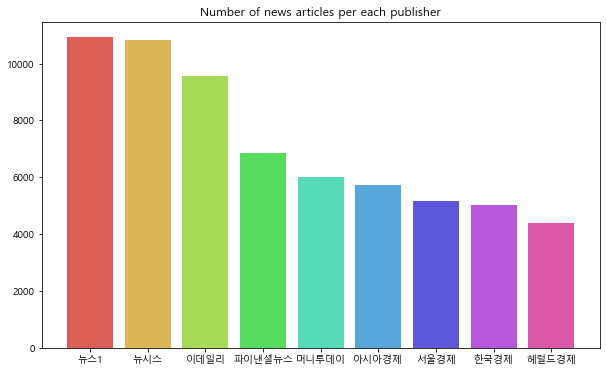

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(10, 6))
y = publisher[publisher['key']!='연합뉴스']["doc_count"]
x = publisher[publisher['key']!='연합뉴스']["key"]
colors = sns.color_palette('hls',len(x))
plt.bar(x,y, color = colors)
plt.title("Number of news articles per each publisher")
plt.show
#plt.rc('font', family='Malgun Gothic')
#plt.rcParams['axes.unicode_minus'] = False

In [45]:
top5 = publisher[publisher['key']!='연합뉴스']['key'][:5]
top5

0       뉴스1
2       뉴시스
3      이데일리
4    파이낸셜뉴스
5     머니투데이
Name: key, dtype: object

In [46]:
def count_per_publisher(publisher):
    query = f"""
    {{
      "size" : 0,
      "query": {{
        "match": {{
          "publisher.keyword": "{publisher}"

        }}
      }},
        "aggs" : {{
          "group_by_date" : {{
            "date_histogram": {{
              "field": "created_at",
              "interval": "day"
            }}
          }}
        }}
    }}
    """
    
    resp = requests.get(
    url,
    data=query.encode('utf-8'),
    headers=headers,
    auth=ELASTIC_SEARCH_AUTH)   
    data = resp.json()
    trend = data['aggregations']['group_by_date']['buckets']    
    df = pd.DataFrame(data=trend)    
    df['date'] = pd.to_datetime(df['key_as_string'])
    df = df.set_index('date')
    df = df['doc_count'].to_frame()
    df.columns = [publisher]
    return df

In [47]:
top5_publisher = pd.DataFrame(index= df.index)
for i in top5:
    top5_publisher[i] = count_per_publisher(i)
top5_publisher

,뉴스1,뉴시스,이데일리,파이낸셜뉴스,머니투데이
date,,,,,
2022-05-01 00:00:00+00:00,217,161,136,128,81
2022-05-02 00:00:00+00:00,468,498,443,351,288
2022-05-03 00:00:00+00:00,527,570,491,313,269
2022-05-04 00:00:00+00:00,500,402,398,292,245
2022-05-05 00:00:00+00:00,116,128,100,99,96
2022-05-06 00:00:00+00:00,279,284,278,123,159
2022-05-07 00:00:00+00:00,45,50,48,26,31
2022-05-08 00:00:00+00:00,104,103,89,110,65
2022-05-09 00:00:00+00:00,446,420,385,289,244


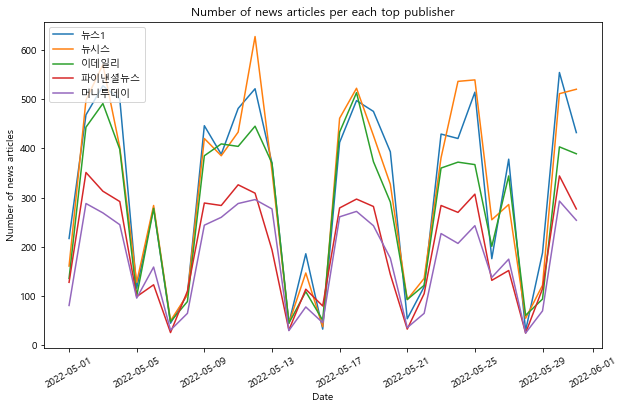

In [48]:
import warnings
warnings.filterwarnings("ignore")

from matplotlib import font_manager, rc

font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Number of news articles")
plt.title("Number of news articles per each top publisher")
plt.xticks(rotation=30)
for i in top5:
    plt.plot(top5_publisher[i], label= i)
plt.legend(loc = "upper left")
plt.show()

## 3. 키워드에 대해 구글트렌드 같은 차트그리기
#### 키워드: 전쟁, 인플레이션, 암호화폐

In [49]:
def keyword(keyword):
    query = f"""
    {{
      "size" : 0,
      "query": {{
        "match": {{
          "body": "{keyword}"

        }}
      }},
        "aggs" : {{
          "group_by_date" : {{
            "date_histogram": {{
              "field": "created_at",
              "interval": "day"
            }}
          }}
        }}
    }}
    """
    
    resp = requests.get(
        url,
        data=query.encode('utf-8'),
        headers=headers,
        auth=ELASTIC_SEARCH_AUTH)    
    data = resp.json()
    trend = data['aggregations']['group_by_date']['buckets']    
    df = pd.DataFrame(data=trend)   
    df['date'] = pd.to_datetime(df['key_as_string'])
    df = df.set_index('date')
    df = df['doc_count'].to_frame()
    df.columns = [keyword]   
    return df

In [50]:
keywords = pd.DataFrame(index= df.index)
keywords['전쟁'] = keyword('전쟁')
keywords['인플레이션'] = keyword('인플레이션')
keywords['암호화폐'] = keyword('암호화폐')
keywords

,전쟁,인플레이션,암호화폐
date,,,
2022-05-01 00:00:00+00:00,56,59,10
2022-05-02 00:00:00+00:00,107,128,23
2022-05-03 00:00:00+00:00,110,151,47
2022-05-04 00:00:00+00:00,83,131,19
2022-05-05 00:00:00+00:00,91,149,11
2022-05-06 00:00:00+00:00,69,133,39
2022-05-07 00:00:00+00:00,28,38,16
2022-05-08 00:00:00+00:00,47,89,13
2022-05-09 00:00:00+00:00,78,182,58


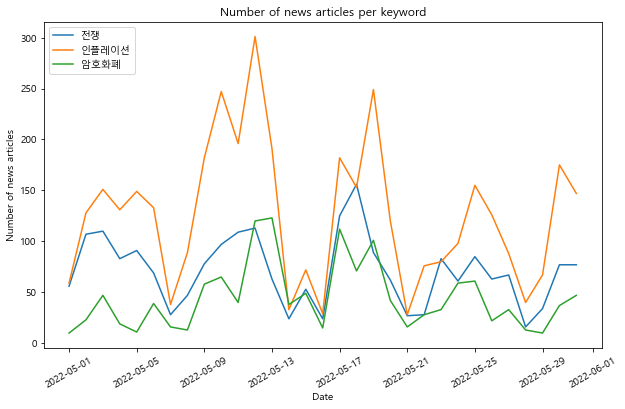

In [51]:
plt.figure(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Number of news articles")
plt.title("Number of news articles per keyword")
plt.xticks(rotation=30)
plt.plot(keywords['전쟁'], label= '전쟁')
plt.plot(keywords['인플레이션'], label = '인플레이션')
plt.plot(keywords['암호화폐'], label = '암호화폐')
plt.legend(loc = "upper left")
plt.show()

In [55]:
ratio = pd.DataFrame(index= df.index)
ratio['전쟁'] = keywords['전쟁']/df['doc_count']
ratio['인플레이션'] = keywords['인플레이션']/df['doc_count']
ratio['암호화폐'] = keywords['암호화폐']/df['doc_count']
ratio

,전쟁,인플레이션,암호화폐
date,,,
2022-05-01 00:00:00+00:00,0.028369,0.029889,0.005066
2022-05-02 00:00:00+00:00,0.018480,0.022107,0.003972
2022-05-03 00:00:00+00:00,0.018478,0.025365,0.007895
2022-05-04 00:00:00+00:00,0.015610,0.024638,0.003573
2022-05-05 00:00:00+00:00,0.046358,0.075904,0.005604
2022-05-06 00:00:00+00:00,0.021017,0.040512,0.011879
2022-05-07 00:00:00+00:00,0.042618,0.057839,0.024353
2022-05-08 00:00:00+00:00,0.029449,0.055764,0.008145
2022-05-09 00:00:00+00:00,0.015125,0.035292,0.011247


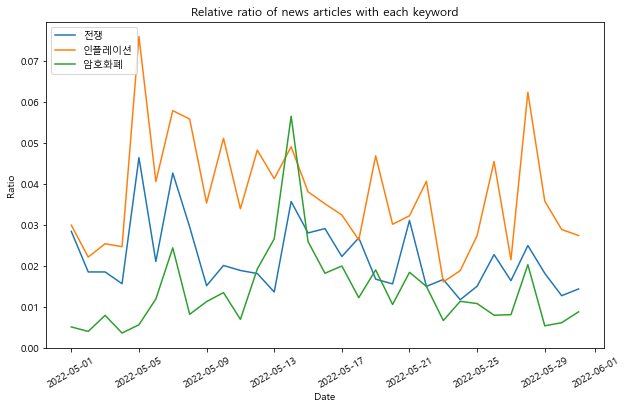

In [53]:
plt.figure(figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Ratio")
plt.title("Relative ratio of news articles with each keyword")
plt.xticks(rotation=30)
plt.plot(ratio['전쟁'], label= '전쟁')
plt.plot(ratio['인플레이션'], label = '인플레이션')
plt.plot(ratio['암호화폐'], label = '암호화폐')
plt.legend(loc = "upper left")
plt.show()

##  4. 각 날짜 별로 주요 이슈 top 3 요약 정리

In [54]:
##def fetch_news_docs(date_from,date_to, page):
    query = f"""
  {{
    "query": {{
      "range": {{
      "created_at": {{
        "gte": "date_from.isoformat()", 
        "lt": date_to.isoformat() 
      }}
      }}
    }},
    "size": 10,
    "from": page * 10 
  }}
 """
    resp = requests.get(
        f'{ELASTIC_SEARCH_URL}/news/_search',
        headers=headers,
        data = json.dumps(query),
        auth=ELASTIC_SEARCH_AUTH)    
    data = json.loads(resp.text)
    hits = data['hits']['hits'] 


    

IndentationError: unexpected indent (Temp/ipykernel_1296/2492039822.py, line 2)